In [1]:
CHAR_DEF = [
    'BLANK', '>', ',', '?', '.',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 
    'H', 'I', 'J', 'K', 'L', 'M', 'N', 
    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 
    'V', 'W', 'X', 'Y', 'Z']
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import re
import time
import pickle
import redis
import argparse
import json
from pathlib import Path

session = 't18.2025.02.04'
dataDir = str(Path('../Data', 't18', session, 'Typing'))
blocks = [5]
print(dataDir)
all_block_mats = []
for b in blocks:
    filename = [str(x) for x in Path(dataDir, 'RedisMat').glob('*('+str(b)+').mat')][0]
    mat = scipy.io.loadmat(filename)
    all_block_mats.append(mat)
print(all_block_mats)

import tensorflow as tf

all_trial_times = []
trial_decodes = []
current_logits = []
all_trial_logits = []
logit_index = 0
redis_clock = []
current_redis_clock = []
cue = []
for b in all_block_mats:
    logit_index = 0
    for trial, (start_time, end_time) in enumerate(zip(b['go_cue_redis_time'][0], b['trial_end_redis_time'][0])):
        all_trial_times.append((end_time-start_time)/(1000*60))
        current_trial = []
        current_logits = []
        current_redis_clock = []
        cue.append(b['cue'][trial].strip())
        while b['decoder_output_redis_clock'][0][logit_index] < end_time:
            if b['decoder_output_redis_clock'][0][logit_index] < start_time:
                logit_index += 1
                continue
            l = b['decoder_logit_output'][logit_index, :31]
            current_logits.append(l)
            current_redis_clock.append(b['decoder_output_redis_clock'][0][logit_index] - start_time)
            logit_index += 1
        all_trial_logits.append(np.array(current_logits))
        redis_clock.append(current_redis_clock)
        current_logits = np.expand_dims(np.array(current_logits), axis=1)
        seq_len = np.expand_dims(current_logits.shape[0], axis=0)
        nTimeSteps = tf.cast((seq_len - 14) / 4 + 1, dtype=tf.int32)
        print(current_logits.shape)
        decoded_sequence, _ = tf.nn.ctc_greedy_decoder(current_logits, seq_len, merge_repeated=True, blank_index=0)
        trial_decodes.append(decoded_sequence[0])

../Data/t18/t18.2025.02.04/Typing
[{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Tue Feb  4 14:20:59 2025', '__version__': '1.0', '__globals__': [], 'participant': array(['t18'], dtype='<U3'), 'session_name': array(['t18.2025.02.04'], dtype='<U14'), 'session_description': array(['This session is for personal-use unprompted brain-to-text typing decoding.'],
      dtype='<U74'), 'block_number': array([[5]]), 'block_description': array(['Runs a personal use brianToText block then runs the parameterUpdater script to get thresholds and lrr weights.'],
      dtype='<U110'), 'block_start_time': array([[1738696092]], dtype=uint64), 'graph_name': array(['BrainToText_PersonalUse.yaml'], dtype='<U28'), 'binned_neural_threshold_crossings': array([[0, 0, 0, ..., 2, 2, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int16), 'binned_neural_spike_ba

2025-04-07 11:55:48.290325: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 11:55:48.313142: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-07 11:55:48.313160: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-07 11:55:48.313187: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-07 11:55:48.318303: I tensorflow/core/platform/cpu_feature_g

(1084, 1, 31)
(670, 1, 31)
(529, 1, 31)
(732, 1, 31)
(696, 1, 31)
(990, 1, 31)
(262, 1, 31)
(648, 1, 31)
(1009, 1, 31)
(953, 1, 31)
(830, 1, 31)
(583, 1, 31)


2025-04-07 11:55:49.236942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-07 11:55:49.284686: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-07 11:55:49.284838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[(4.056, 'M'), (4.959, 'Y'), (7.12, '>'), (9.16, 'F'), (9.4, 'A'), (11.079, 'V'), (11.68, 'O'), (12.879, 'I'), (14.079, 'T'), (14.679, 'E'), (15.519, '>'), (16.96, 'P'), (18.04, 'L'), (19.0, 'A'), (20.199, 'C'), (20.559, 'E'), (21.519, '>'), (22.72, 'T'), (23.8, 'H'), (24.759, 'A'), (25.719, 'T'), (27.16, '>'), (28.599, 'O'), (29.2, 'I'), (31.119, '>'), (33.279, 'H'), (33.759, 'A'), (35.199, 'B'), (36.879, 'E'), (38.079, '>'), (39.999, 'L'), (40.479, 'O'), (42.758, 'V'), (43.239, 'E'), (44.558, 'D'), (44.92, '>'), (46.6, 'I'), (47.559, 'S'), (48.519, '>'), (52.359, 'V'), (53.319, 'O'), (54.879, 'R'), (56.559, 'G'), (57.159, 'I'), (58.599, 'N'), (60.639, 'I'), (61.118, 'A'), (61.959, '>'), (63.999, 'B'), (64.599, 'E'), (65.559, 'A'), (66.999, 'C'), (67.598, 'H'), (67.839, '>'), (68.919, '.')]
I
BLANK
I
I


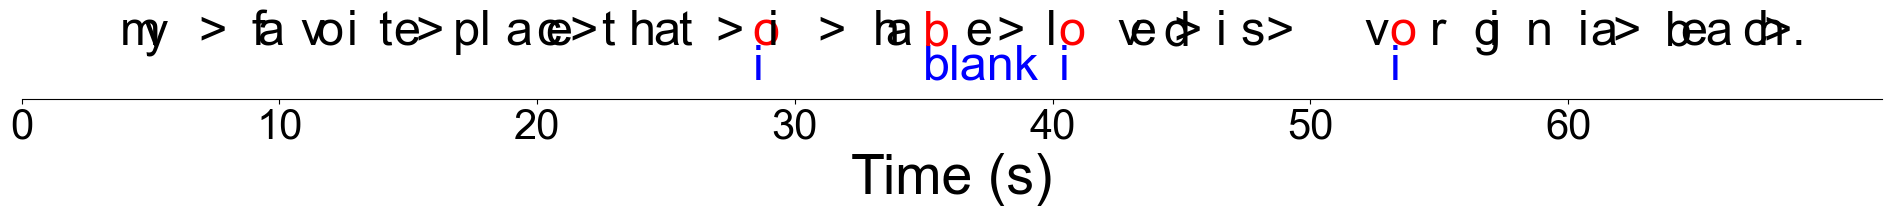

In [6]:
trial_num = 0
logits = all_trial_logits[trial_num]
prev_letter  = -1
all_kept_logits = []
res = []
for i in range(len(redis_clock[trial_num])):
    if np.argmax(logits[i]) != 0 and np.max(logits[i]) > 0 and (np.argmax(logits[i]) != prev_letter):# or CHAR_DEF[prev_letter] == 'E'): # or CHAR_DEF[prev_letter] == 'N'):
        #prev_letter = np.argmax(logits[i]) 
        next_logit = np.argsort(logits[i], axis=0)[-2]
        #print(i, redis_clock[trial_num][i]/(1000), CHAR_DEF[np.argmax(logits[i])], CHAR_DEF[next_logit])
        res.append((redis_clock[trial_num][i]/(1000), CHAR_DEF[np.argmax(logits[i])]))
        prev_letter = np.argmax(logits[i])
        all_kept_logits.append(logits[i])

plt.rcParams["figure.figsize"] = (30,1)
plt.rcParams["font.family"] = "Arial"
print(res)
error_indices = [22,27,31,40]

plt.subplots(figsize=(8, 2))
ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(24, 0.5)
y = [1] * len(res)
for idx, (r,y_axis) in enumerate(zip(res,y)):
    if idx in error_indices:
        c = 'r'
        next_logit = np.argsort(all_kept_logits[idx], axis=0)[-2]
        print(CHAR_DEF[next_logit])
        ax.text(r[0]-0.25, 1.0,CHAR_DEF[next_logit].lower(),fontsize=35, color = 'b')
    else:
        c = 'k'
    symbol =  r[1].lower()

    ax.plot(r[0], 1.0,marker=r"${%s}$" % symbol,lw=0, color='w',markersize=0)
    ax.text(r[0]-0.25, 1.1,symbol,fontsize=35, color = c)

ax.axes.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(np.arange(0, 70, 10)) 
plt.xticks(fontsize=30)
plt.xlabel('Time (s)', fontsize=40)
plt.savefig('T18VirginiaBeach.pdf', bbox_inches='tight')
plt.show()